In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\akelo\\Desktop\\DATASETS\\car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [5]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.strip().str.replace(r'/s+','_',regex =True)

In [7]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
strings =list(df.dtypes[df.dtypes == object].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(r'/+s','_', regex=True).str.strip()

In [10]:
df['horsepower'].median()

np.float64(149.0)

In [11]:
#n =len(df)
#n_train = int(n*0.6)
#n_val =int(n*0.2)
#n_test  =int(n-n_train-n_val)
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val  # This is just for reference


In [12]:
(n_test+n_val+n_train,n)

(9704, 9704)

In [13]:
idx = n

In [14]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]


In [15]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
5817,150,0.0,161.0,4068.513641,15.3,2015,asia,gasoline,all-wheel drive,-2.0,10.153402
5818,200,4.0,148.0,3702.689430,17.0,2014,usa,gasoline,all-wheel drive,0.0,11.536125
5819,160,4.0,156.0,2990.334203,14.6,2020,asia,diesel,front-wheel drive,NaN,15.294958
5820,240,7.0,105.0,3495.100812,13.8,2014,asia,gasoline,all-wheel drive,1.0,12.426054


In [16]:
idx =np.arange(n)
np.random.shuffle(idx)
idx

array([1015, 5033,  347, ..., 2310, 1794, 6373], shape=(9704,))

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [18]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1015,170,3.0,166.0,3614.473928,16.6,2001,europe,diesel,all-wheel drive,0.0,11.627882
5033,110,NaN,152.0,3448.725302,13.5,2002,asia,diesel,all-wheel drive,0.0,12.728691
347,210,7.0,196.0,2657.222331,14.0,2011,europe,gasoline,all-wheel drive,NaN,17.738661
8931,260,1.0,108.0,3189.453942,13.8,2003,europe,gasoline,front-wheel drive,0.0,14.313054
70,340,3.0,148.0,2431.589623,NaN,2002,usa,diesel,all-wheel drive,1.0,17.634290
...,...,...,...,...,...,...,...,...,...,...,...
6234,250,4.0,135.0,1871.756432,12.0,2016,usa,gasoline,front-wheel drive,0.0,20.525350
150,160,2.0,194.0,2798.569233,13.0,2015,usa,diesel,all-wheel drive,-1.0,16.469556
8998,290,2.0,175.0,3341.002552,11.9,2011,asia,gasoline,front-wheel drive,0.0,13.480688
5109,240,6.0,149.0,3858.240267,19.0,2013,europe,gasoline,front-wheel drive,0.0,11.062447


In [19]:
df_test

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
5488,110,7.0,124.0,2292.586182,19.7,2021,europe,diesel,front-wheel drive,0.0,18.113592
243,220,6.0,110.0,3745.846003,17.3,2015,usa,diesel,front-wheel drive,NaN,10.698773
3363,220,2.0,145.0,3127.171481,12.9,2013,europe,gasoline,all-wheel drive,2.0,14.469494
2017,200,4.0,135.0,2643.945624,17.4,2000,asia,gasoline,front-wheel drive,1.0,16.160280
3579,160,5.0,102.0,2350.565459,19.9,2001,asia,gasoline,front-wheel drive,0.0,17.196241
...,...,...,...,...,...,...,...,...,...,...,...
7849,260,1.0,133.0,3313.769899,16.9,2011,europe,gasoline,front-wheel drive,-3.0,13.336006
8463,170,4.0,192.0,2527.769735,15.4,2017,usa,diesel,front-wheel drive,1.0,18.652883
2310,210,4.0,168.0,2511.239151,13.6,2016,asia,gasoline,front-wheel drive,-1.0,17.839726
1794,170,2.0,144.0,2361.579696,14.0,2001,europe,diesel,front-wheel drive,0.0,18.643608


In [20]:
df_val

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
6464,180,6.0,150.0,2361.477477,19.0,2001,usa,gasoline,front-wheel drive,0.0,17.704548
6725,130,4.0,138.0,3400.418191,14.1,2022,asia,gasoline,front-wheel drive,NaN,12.776019
4867,170,1.0,185.0,2605.775611,12.6,2000,usa,diesel,front-wheel drive,-2.0,17.393294
9545,230,3.0,128.0,3800.034481,16.4,2004,asia,diesel,front-wheel drive,-1.0,10.640817
478,100,5.0,NaN,2832.820962,9.3,2015,usa,gasoline,front-wheel drive,0.0,16.696312
...,...,...,...,...,...,...,...,...,...,...,...
3131,260,4.0,87.0,4390.657285,16.6,2019,usa,diesel,all-wheel drive,-1.0,7.516991
893,200,3.0,90.0,3378.420104,13.9,2012,usa,gasoline,front-wheel drive,1.0,12.995353
8725,200,2.0,NaN,3459.776878,17.8,2014,europe,gasoline,front-wheel drive,0.0,12.175678
644,250,3.0,166.0,3100.508400,14.7,2007,asia,gasoline,front-wheel drive,-1.0,14.786646


In [21]:
len(df_train),len(df_val),len(df_test)

(5822, 1940, 1942)

In [22]:
# Check for overlap
overlap_val_test = pd.merge(df_val, df_test, how='inner')
print(f"Overlap between val and test: {len(overlap_val_test)} rows")

overlap_train_val = pd.merge(df_train, df_val, how='inner')
print(f"Overlap between train and val: {len(overlap_train_val)} rows")

overlap_train_test = pd.merge(df_train, df_test, how='inner')
print(f"Overlap between train and test: {len(overlap_train_test)} rows")

Overlap between val and test: 0 rows
Overlap between train and val: 0 rows
Overlap between train and test: 0 rows


In [23]:
len(df_train)+len(df_val)+len(df_test)

9704

In [24]:
df.count()

engine_displacement    9704
num_cylinders          9222
horsepower             8996
vehicle_weight         9704
acceleration           8774
model_year             9704
origin                 9704
fuel_type              9704
drivetrain             9704
num_doors              9202
fuel_efficiency_mpg    9704
dtype: int64

In [25]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test =df_test.reset_index(drop = True)

In [26]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,166.0,3614.473928,16.6,2001,europe,diesel,all-wheel drive,0.0,11.627882
1,110,NaN,152.0,3448.725302,13.5,2002,asia,diesel,all-wheel drive,0.0,12.728691
2,210,7.0,196.0,2657.222331,14.0,2011,europe,gasoline,all-wheel drive,NaN,17.738661
3,260,1.0,108.0,3189.453942,13.8,2003,europe,gasoline,front-wheel drive,0.0,14.313054
4,340,3.0,148.0,2431.589623,NaN,2002,usa,diesel,all-wheel drive,1.0,17.634290
...,...,...,...,...,...,...,...,...,...,...,...
5817,250,4.0,135.0,1871.756432,12.0,2016,usa,gasoline,front-wheel drive,0.0,20.525350
5818,160,2.0,194.0,2798.569233,13.0,2015,usa,diesel,all-wheel drive,-1.0,16.469556
5819,290,2.0,175.0,3341.002552,11.9,2011,asia,gasoline,front-wheel drive,0.0,13.480688
5820,240,6.0,149.0,3858.240267,19.0,2013,europe,gasoline,front-wheel drive,0.0,11.062447


In [27]:
df_test

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,110,7.0,124.0,2292.586182,19.7,2021,europe,diesel,front-wheel drive,0.0,18.113592
1,220,6.0,110.0,3745.846003,17.3,2015,usa,diesel,front-wheel drive,NaN,10.698773
2,220,2.0,145.0,3127.171481,12.9,2013,europe,gasoline,all-wheel drive,2.0,14.469494
3,200,4.0,135.0,2643.945624,17.4,2000,asia,gasoline,front-wheel drive,1.0,16.160280
4,160,5.0,102.0,2350.565459,19.9,2001,asia,gasoline,front-wheel drive,0.0,17.196241
...,...,...,...,...,...,...,...,...,...,...,...
1937,260,1.0,133.0,3313.769899,16.9,2011,europe,gasoline,front-wheel drive,-3.0,13.336006
1938,170,4.0,192.0,2527.769735,15.4,2017,usa,diesel,front-wheel drive,1.0,18.652883
1939,210,4.0,168.0,2511.239151,13.6,2016,asia,gasoline,front-wheel drive,-1.0,17.839726
1940,170,2.0,144.0,2361.579696,14.0,2001,europe,diesel,front-wheel drive,0.0,18.643608


In [28]:
df_val

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,180,6.0,150.0,2361.477477,19.0,2001,usa,gasoline,front-wheel drive,0.0,17.704548
1,130,4.0,138.0,3400.418191,14.1,2022,asia,gasoline,front-wheel drive,NaN,12.776019
2,170,1.0,185.0,2605.775611,12.6,2000,usa,diesel,front-wheel drive,-2.0,17.393294
3,230,3.0,128.0,3800.034481,16.4,2004,asia,diesel,front-wheel drive,-1.0,10.640817
4,100,5.0,NaN,2832.820962,9.3,2015,usa,gasoline,front-wheel drive,0.0,16.696312
...,...,...,...,...,...,...,...,...,...,...,...
1935,260,4.0,87.0,4390.657285,16.6,2019,usa,diesel,all-wheel drive,-1.0,7.516991
1936,200,3.0,90.0,3378.420104,13.9,2012,usa,gasoline,front-wheel drive,1.0,12.995353
1937,200,2.0,NaN,3459.776878,17.8,2014,europe,gasoline,front-wheel drive,0.0,12.175678
1938,250,3.0,166.0,3100.508400,14.7,2007,asia,gasoline,front-wheel drive,-1.0,14.786646


In [29]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [30]:
y_train

array([2.53590721, 2.6194879 , 2.93058883, ..., 2.67281588, 2.4900971 ,
       2.77210206], shape=(5822,))

In [31]:
y_val

array([2.92876671, 2.62292935, 2.91198617, ..., 2.57837253, 2.75916442,
       2.78866748], shape=(1940,))

In [32]:
y_test

array([2.95039971, 2.45948397, 2.73886993, ..., 2.93596772, 2.97775198,
       2.67693963], shape=(1942,))

In [33]:
df.dtypes


engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [34]:
df_train.iloc[10]

engine_displacement                  190
num_cylinders                        2.0
horsepower                         146.0
vehicle_weight               4031.905202
acceleration                        12.8
model_year                          2002
origin                              asia
fuel_type                       gasoline
drivetrain             front-wheel drive
num_doors                           -1.0
fuel_efficiency_mpg            10.266303
Name: 10, dtype: object

In [35]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,europe,diesel,front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,usa,gasoline,all-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,usa,diesel,all-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,usa,diesel,front-wheel drive,1.0,15.331551


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

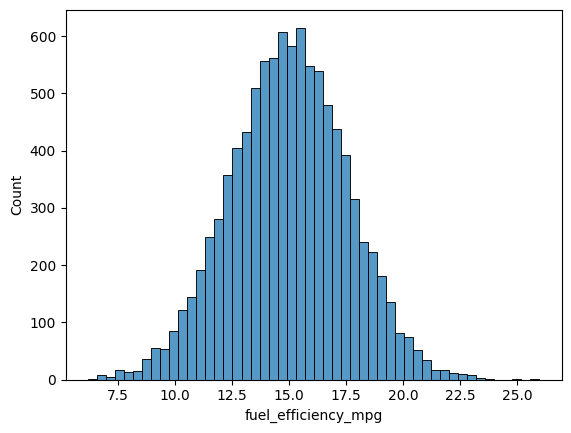

In [37]:
sns.histplot(df.fuel_efficiency_mpg,bins =50)

In [38]:
first = np.log1p(df.fuel_efficiency_mpg)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

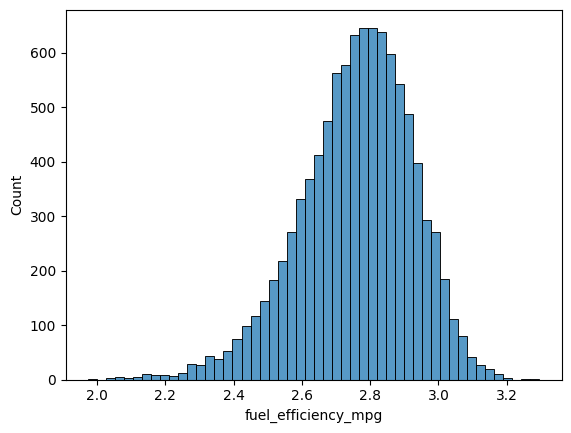

In [39]:
sns.histplot(first,bins =50)

In [40]:
df.isnull()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9699,False,False,False,False,False,False,False,False,False,True,False
9700,False,True,False,False,False,False,False,False,False,False,False
9701,False,False,False,False,False,False,False,False,False,False,False
9702,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [42]:
df['horsepower']=df['horsepower'].fillna(0).values

In [43]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower               0
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [44]:
df_test.equals(df_val)

False

In [45]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [46]:
len (y_train),len(y_val),len(y_test)


(5822, 1940, 1942)

In [47]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [48]:
def train_linear_regression(X, y):
    pass

In [49]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [50]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
X = np.column_stack([ones, X])

In [52]:
y = [100, 20, 150, 210, 10, 220, 15, 25, 12]

In [53]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.pinv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [54]:
w0 = w_full[0]
w = w_full[1:]

In [55]:
w0, w

(np.float64(278.77624020180554),
 array([-0.13898613, -5.36078686, -0.04723769]))

In [56]:
train_linear_regression(X, y)

In [57]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,170,3.0,166.0,3614.473928,16.6,2001,europe,diesel,all-wheel drive,0.0
1,110,NaN,152.0,3448.725302,13.5,2002,asia,diesel,all-wheel drive,0.0
2,210,7.0,196.0,2657.222331,14.0,2011,europe,gasoline,all-wheel drive,NaN
3,260,1.0,108.0,3189.453942,13.8,2003,europe,gasoline,front-wheel drive,0.0
4,340,3.0,148.0,2431.589623,NaN,2002,usa,diesel,all-wheel drive,1.0
...,...,...,...,...,...,...,...,...,...,...
5817,250,4.0,135.0,1871.756432,12.0,2016,usa,gasoline,front-wheel drive,0.0
5818,160,2.0,194.0,2798.569233,13.0,2015,usa,diesel,all-wheel drive,-1.0
5819,290,2.0,175.0,3341.002552,11.9,2011,asia,gasoline,front-wheel drive,0.0
5820,240,6.0,149.0,3858.240267,19.0,2013,europe,gasoline,front-wheel drive,0.0


In [58]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [59]:
base = ['engine_displacement','horsepower','vehicle_weight']
df_train[base]

,engine_displacement,horsepower,vehicle_weight
0,170,166.0,3614.473928
1,110,152.0,3448.725302
2,210,196.0,2657.222331
3,260,108.0,3189.453942
4,340,148.0,2431.589623
...,...,...,...
5817,250,135.0,1871.756432
5818,160,194.0,2798.569233
5819,290,175.0,3341.002552
5820,240,149.0,3858.240267


In [60]:
x_train = df_train[base].values

In [61]:
y_train

array([2.53590721, 2.6194879 , 2.93058883, ..., 2.67281588, 2.4900971 ,
       2.77210206], shape=(5822,))

In [62]:
df_train[base].fillna(0).isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
dtype: int64

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [78]:
train_linear_regression(X, y)

(np.float64(139.38812010168996),
 array([ 1.39388120e+02, -1.38986130e-01, -5.36078686e+00, -4.72376895e-02]))